# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-10-01 19:00:09.696390


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/30/20


,9/30/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,7234007,206932,2.86
Brazil,4810935,143952,2.99
India,6312584,98678,1.56
Mexico,743216,77646,10.45
United Kingdom,455846,42233,9.26
Italy,314861,35894,11.40
Peru,811768,32396,3.99


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 9/30/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
43766,US,7150498,2020-09-28,205072.0,316.0,33317.0,40966.714286
43765,US,7117181,2020-09-27,204756.0,266.0,36424.0,43702.714286
43764,US,7080757,2020-09-26,204490.0,740.0,44875.0,43672.714286
43763,US,7035882,2020-09-25,203750.0,952.0,50591.0,43555.000000
43762,US,6985291,2020-09-24,202798.0,914.0,44140.0,43288.142857
43761,US,6941151,2020-09-23,201884.0,1098.0,38448.0,43373.142857
43760,US,6902703,2020-09-22,200786.0,921.0,38972.0,43388.857143


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/30/20


,9/30/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,458649,33153.0,7.23
New Jersey,205275,16122.0,7.85
Texas,773019,16016.0,2.07
California,819115,15885.0,1.94
Florida,706516,14317.0,2.03
Massachusetts,132116,9456.0,7.16
Illinois,295720,8916.0,3.02


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 9/30/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1515,California,812711,2020-09-28,15633.0,27.0,2821.0,3230.714286
1514,California,809890,2020-09-27,15606.0,23.0,2439.0,3388.857143
1513,California,807451,2020-09-26,15583.0,67.0,3791.0,3448.285714
1512,California,803660,2020-09-25,15516.0,123.0,4144.0,3452.714286
1511,California,799516,2020-09-24,15393.0,102.0,3080.0,3497.000000
1510,California,796436,2020-09-23,15291.0,102.0,3371.0,3587.857143
1509,California,793065,2020-09-22,15189.0,133.0,2969.0,3551.571429


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 9/30/20


,9/30/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,270299,6576.0,2.43
Orange,53751,1268.0,2.36
Riverside,59405,1226.0,2.06
San Bernardino,55203,955.0,1.73
San Diego,47180,783.0,1.66
San Joaquin,20411,456.0,2.23
Sacramento,22590,416.0,1.84


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 9/30/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
4804,Los Angeles,268455,2020-09-28,6515.0,1.0,654.0,1001.285714
4803,Los Angeles,267801,2020-09-27,6514.0,10.0,813.0,1000.571429
4802,Los Angeles,266988,2020-09-26,6504.0,16.0,1213.0,1024.428571
4801,Los Angeles,265775,2020-09-25,6488.0,33.0,1361.0,1037.000000
4800,Los Angeles,264414,2020-09-24,6455.0,32.0,1081.0,1020.428571
4799,Los Angeles,263333,2020-09-23,6423.0,22.0,1200.0,1026.428571
4798,Los Angeles,262133,2020-09-22,6401.0,35.0,687.0,1012.000000
4797,Los Angeles,261446,2020-09-21,6366.0,13.0,649.0,970.000000
4796,Los Angeles,260797,2020-09-20,6353.0,23.0,980.0,973.142857
4795,Los Angeles,259817,2020-09-19,6330.0,0.0,1301.0,948.714286



7 day new US cases as of 9/30/20


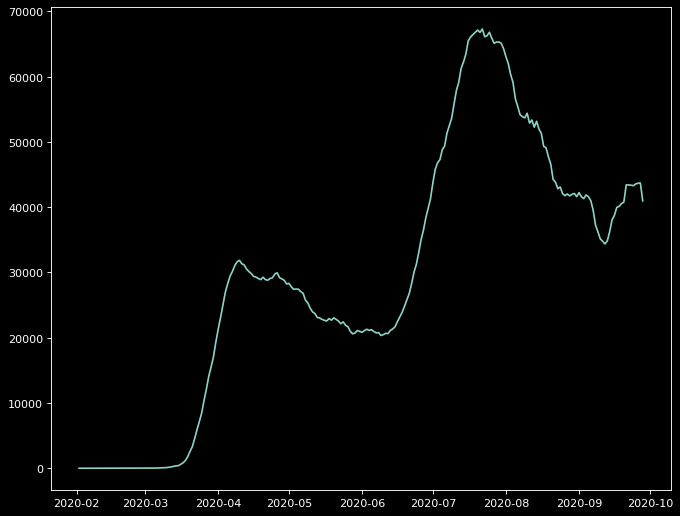

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 9/30/20


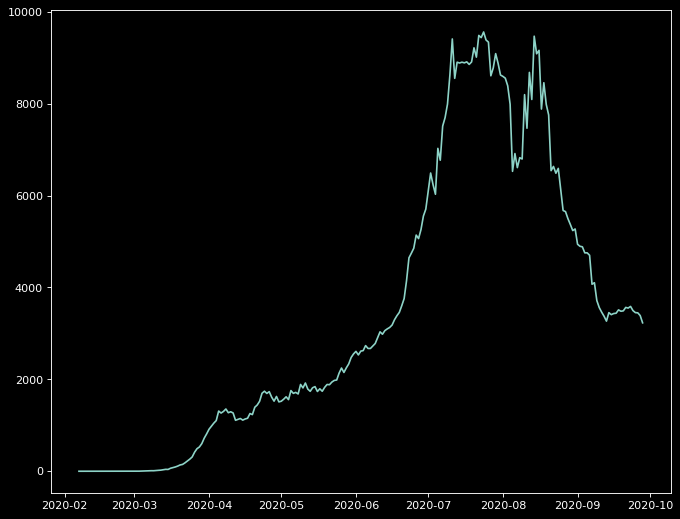

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 9/30/20


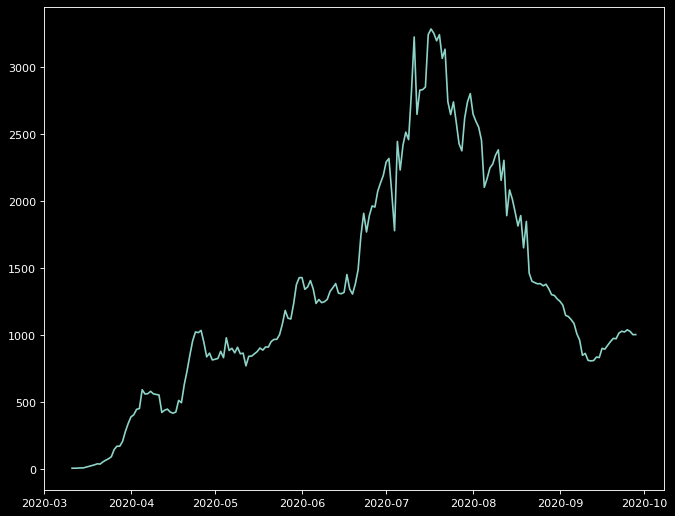

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()